<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/PCA_full_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
cancer=pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv')

In [3]:
scaler=StandardScaler()
pca=PCA()
pipeline=make_pipeline(scaler,pca)

In [4]:
cancer.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
features=cancer.drop(columns='Unnamed: 32')

In [6]:
le=LabelEncoder()
cancer['diagnosis']=le.fit_transform(cancer.diagnosis)
y=cancer['diagnosis']

In [13]:
features=cancer.drop(columns=['Unnamed: 32','diagnosis','id'])

In [14]:
pipeline.fit(features)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [15]:
pca.components_[:,0].shape

(30,)

In [29]:
pd.DataFrame(pca.components_,columns=features.columns).head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
2,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
3,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,...,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
4,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,...,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423


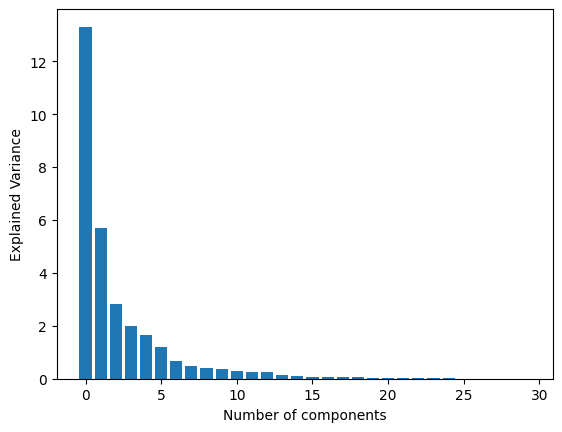

In [17]:
feat=range(pca.n_components_)
explained_variance=pca.explained_variance_
fig,ax=plt.subplots()
ax.bar(x=feat,height=explained_variance)
ax.set_xlabel('Number of components')
ax.set_ylabel('Explained Variance')
plt.show()

In [18]:
pca=PCA(n_components=5)
scaler=StandardScaler()
pipeline=make_pipeline(scaler,pca)
pipeline.fit(features)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5))])

In [19]:
transformed=pipeline.transform(features)

In [20]:
X=pd.DataFrame(transformed,columns=['PCA1','PCA2','PCA3','PCA4','PCA5'])

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt=DecisionTreeClassifier(max_depth=5)

In [24]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [25]:
y_pred=dt.predict(X_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        77
           1       0.91      0.84      0.87        37

    accuracy                           0.92       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [28]:
cancer.diagnosis.value_counts(normalize=True)

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64